In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import style
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import warnings
from word2number import w2n 
from sklearn.preprocessing import PolynomialFeatures

In [106]:
warnings.filterwarnings('ignore')

In [107]:
#Import Dataset
df = pd.read_csv('Assets/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [108]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [109]:
X = df.iloc[:,1]

In [110]:
X.shape

(10,)

In [111]:
X = pd.DataFrame(X)

In [112]:
X.shape

(10, 1)

In [113]:
y = df.iloc[:,-1]

In [114]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [115]:
y.shape

(10,)

In [116]:
lr = LinearRegression()

In [117]:
lr.fit(X,y)

LinearRegression()

In [118]:
lr.coef_

array([80878.78787879])

In [119]:
X_test = pd.DataFrame({'Level':[2,5,6,7,1,3,4,8,9,10]}) #created a dummy data for testing.

In [120]:
X_test

,Level
0,2
1,5
2,6
3,7
4,1
5,3
6,4
7,8
8,9
9,10


In [121]:
pred = lr.predict(X_test)
pred

array([ -33575.75757576,  209060.60606061,  289939.39393939,
        370818.18181818, -114454.54545455,   47303.03030303,
        128181.81818182,  451696.96969697,  532575.75757576,
        613454.54545455])

### Prediction with Linear Regression

In [122]:
lr.predict([[6.5]]) #See person with 6.5 year experience showing 330378 
#but actual in df you can see it should between 150k to 200k.

array([330378.78787879])

In [123]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [124]:
r2_score(y,pred)

0.49357144554402255

# Accuracy is almost 50 percent because we have used linear regression but this is a non linear problem

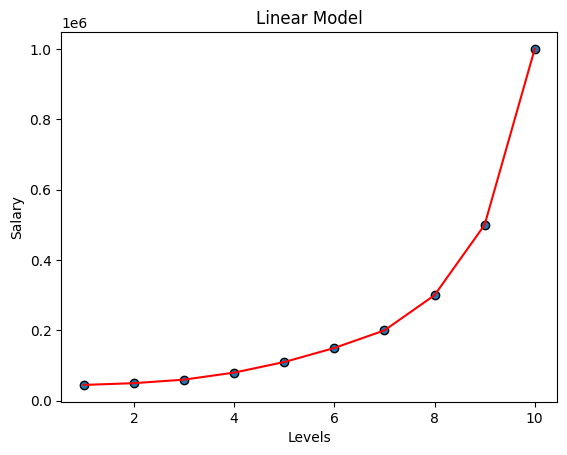

In [125]:
plt.scatter(X,y,edgecolors='Black')
plt.plot(X,y, color = "red") 
plt.title('Linear Model')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()


Proved it is a non-linear as we cannot see straight line data so we will use polynomial/non-linear regression based model.

# Fitting with Polynomial Regression

In [126]:
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X) #to convert feature into multiple-features
X_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [127]:
poly_reg.degree

5

In [128]:
poly_reg.fit(X_poly,y)

PolynomialFeatures(degree=5)

In [129]:
p_lr = LinearRegression()
p_lr.fit(X_poly,y)

LinearRegression()

In [130]:
X_poly.shape

(10, 6)

In [131]:
y.shape

(10,)

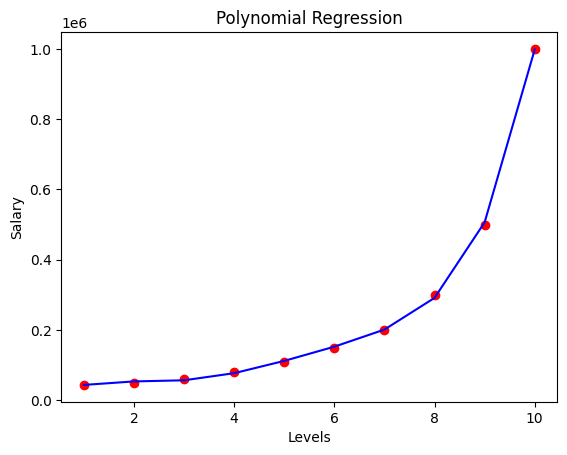

In [135]:
plt.scatter(X,y, color= 'red')
plt.plot(X,p_lr.predict(X_poly),color = 'blue')
plt.title("Polynomial Regression")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()

In [136]:
p_lr.predict(poly_reg.fit_transform([[6.5]])) #See now it is showing correct results

array([174878.07765173])

In [137]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Now how dev can know which degree is best for our model

In [142]:
#Lets try iterating with each degree
for i in range(1,11):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X)

    p_lr = LinearRegression()
    p_lr.fit(X_poly,y)
    print('Degree %d'%i)
    print("Possible Score:",r2_score(y,p_lr.predict(X_poly)))

Degree 1
Possible Score: 0.6690412331929895
Degree 2
Possible Score: 0.9162082221443942
Degree 3
Possible Score: 0.9812097727913366
Degree 4
Possible Score: 0.9973922891706614
Degree 5
Possible Score: 0.9997969027099755
Degree 6
Possible Score: 0.9999494749253776
Degree 7
Possible Score: 0.9999770143729169
Degree 8
Possible Score: 0.9999934972438329
Degree 9
Possible Score: 0.9999999999999825
Degree 10
Possible Score: 1.0


> Now we can see from 4 or 5 is best accuracy which is converging points so we can use both.
> Also, chances of overfit will be there if trained with higher degree.